#### **Importando Librerías**



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### **Montando Unidad de Google Drive**
Este bloque de código es solo para usuario que utilicen Google Colab como entorno de desarrollo

In [3]:
#from google.colab import drive
#drive.mount('/content/drive')

### **Ruta del Dataset**

In [4]:
ruta = "Data/games.csv"

In [5]:
datos = pd.read_csv(ruta, index_col='Id') #Aqui usamos pd.readcsv para leer el archivo, luego ponemos la ruta y despues la clave de index con una id

In [6]:
datos.head() #Aqui imprimimos los valores

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,Elden Ring,"Feb 25, 2022","['Bandai Namco Entertainment', 'FromSoftware']",4.5,3.9K,3.9K,"['Adventure', 'RPG']","Elden Ring is a fantasy, action and open world...","[""The first playthrough of elden ring is one o...",17K,3.8K,4.6K,4.8K
1,Hades,"Dec 10, 2019",['Supergiant Games'],4.3,2.9K,2.9K,"['Adventure', 'Brawler', 'Indie', 'RPG']",A rogue-lite hack and slash dungeon crawler in...,['convinced this is a roguelike for people who...,21K,3.2K,6.3K,3.6K
2,The Legend of Zelda: Breath of the Wild,"Mar 03, 2017","['Nintendo', 'Nintendo EPD Production Group No...",4.4,4.3K,4.3K,"['Adventure', 'RPG']",The Legend of Zelda: Breath of the Wild is the...,['This game is the game (that is not CS:GO) th...,30K,2.5K,5K,2.6K
3,Undertale,"Sep 15, 2015","['tobyfox', '8-4']",4.2,3.5K,3.5K,"['Adventure', 'Indie', 'RPG', 'Turn Based Stra...","A small child falls into the Underground, wher...",['soundtrack is tied for #1 with nier automata...,28K,679,4.9K,1.8K
4,Hollow Knight,"Feb 24, 2017",['Team Cherry'],4.4,3K,3K,"['Adventure', 'Indie', 'Platform']",A 2D metroidvania with an emphasis on close co...,"[""this games worldbuilding is incredible, with...",21K,2.4K,8.3K,2.3K


<h4><b>DIMENSIÓN DEL DATASET</b></h4>


In [7]:
print(f'Cantidad de Filas y Columnas del Dataset: {datos.shape}') #Aqui con shape, identificamos las filas y columnas

Cantidad de Filas y Columnas del Dataset: (1512, 13)


<h4><b>MOSTRANDO INFORMACIÓN DEL DATASET</b></h4>

In [8]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1512 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1512 non-null   object 
 1   Release Date       1512 non-null   object 
 2   Team               1511 non-null   object 
 3   Rating             1499 non-null   float64
 4   Times Listed       1512 non-null   object 
 5   Number of Reviews  1512 non-null   object 
 6   Genres             1512 non-null   object 
 7   Summary            1511 non-null   object 
 8   Reviews            1512 non-null   object 
 9   Plays              1512 non-null   object 
 10  Playing            1512 non-null   object 
 11  Backlogs           1512 non-null   object 
 12  Wishlist           1512 non-null   object 
dtypes: float64(1), object(12)
memory usage: 165.4+ KB


<h4><b>ESTADÍSTICAS DESCRIPTIVAS DEL DATASET</b></h4>


In [9]:
datos.describe()

,Rating
count,1499.000000
mean,3.719346
std,0.532608
min,0.700000
25%,3.400000
50%,3.800000
75%,4.100000
max,4.800000


<h4><b>MOSTRANDO LAS FILAS DE DATOS NULOS</b></h4>

In [10]:
datos.isnull()

,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1507,False,False,False,False,False,False,False,False,False,False,False,False,False
1508,False,False,False,False,False,False,False,False,False,False,False,False,False
1509,False,False,False,False,False,False,False,False,False,False,False,False,False


<h4><b>IDENTIFICANDO LAS COLUMNAS CON DATOS NULOS</b></h4>


In [11]:
datos.isnull().any() #Aqui con any podremos ver los datos nulos

Title                False
Release Date         False
Team                  True
Rating                True
Times Listed         False
Number of Reviews    False
Genres               False
Summary               True
Reviews              False
Plays                False
Playing              False
Backlogs             False
Wishlist             False
dtype: bool

<h4><b>IDENTIFICANDO LAS FILAS EN ESPECIFICAS CON DATOS NULOS</b></h4>


In [12]:
# Filtrar las filas que contienen valores nulos
filas_nulas = datos[datos.isnull().any(axis=1)] #Axis=0 eje vertical, axis=1 horizontal

filas_nulas


,Title,Release Date,Team,Rating,Times Listed,Number of Reviews,Genres,Summary,Reviews,Plays,Playing,Backlogs,Wishlist
Id,,,,,,,,,,,,,
587,Final Fantasy XVI,"Jun 22, 2023","['Square Enix', 'Square Enix Creative Business...",NaN,422,422,['RPG'],Final Fantasy XVI is an upcoming action role-p...,[],37,10,732,2.4K
649,Death Stranding 2,releases on TBD,['Kojima Productions'],NaN,105,105,"['Adventure', 'Shooter']",NaN,[],3,0,209,644
713,Final Fantasy VII Rebirth,"Dec 31, 2023",['Square Enix'],NaN,192,192,[],This next standalone chapter in the FINAL FANT...,[],20,3,354,1.1K
719,Lies of P,"Aug 01, 2023","['NEOWIZ', 'Round8 Studio']",NaN,175,175,['RPG'],"Inspired by the familiar story of Pinocchio, L...",[],5,0,260,939
726,Judas,"Mar 31, 2025",['Ghost Story Games'],NaN,90,90,"['Adventure', 'Shooter']",A disintegrating starship. A desperate escape ...,[],1,0,92,437
746,Like a Dragon Gaiden: The Man Who Erased His Name,"Dec 31, 2023","['Ryū Ga Gotoku Studios', 'Sega']",NaN,118,118,"['Adventure', 'Brawler', 'RPG']",This game covers Kiryu's story between Yakuza ...,[],2,1,145,588
972,The Legend of Zelda: Tears of the Kingdom,"May 12, 2023","['Nintendo', 'Nintendo EPD Production Group No...",NaN,581,581,"['Adventure', 'RPG']",The Legend of Zelda: Tears of the Kingdom is t...,[],72,6,1.6K,5.4K
1130,Star Wars Jedi: Survivor,"Apr 28, 2023","['Respawn Entertainment', 'Electronic Arts']",NaN,250,250,['Adventure'],The story of Cal Kestis continues in Star Wars...,[],13,2,367,1.4K
1160,We Love Katamari Reroll + Royal Reverie,"Jun 02, 2023","['Bandai Namco Entertainment', 'MONKEYCRAFT Co...",NaN,51,51,"['Adventure', 'Puzzle']",We Love Katamari Reroll + Royal Reverie is a r...,[],3,0,74,291


<h4><b>ELIMINANDO LOS DATOS NULOS DEL DATASET</b></h4>


In [13]:
data_sin_nulos = datos.dropna() #elimina filas nulas
data_sin_nulos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1498 entries, 0 to 1511
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Title              1498 non-null   object 
 1   Release Date       1498 non-null   object 
 2   Team               1498 non-null   object 
 3   Rating             1498 non-null   float64
 4   Times Listed       1498 non-null   object 
 5   Number of Reviews  1498 non-null   object 
 6   Genres             1498 non-null   object 
 7   Summary            1498 non-null   object 
 8   Reviews            1498 non-null   object 
 9   Plays              1498 non-null   object 
 10  Playing            1498 non-null   object 
 11  Backlogs           1498 non-null   object 
 12  Wishlist           1498 non-null   object 
dtypes: float64(1), object(12)
memory usage: 163.8+ KB


<h4><b>FUNCIÓN PARA VERIFICAR SI EL GENERO RPG ESTÁ PRESENTE EN EL DATASET</b></h4>

In [14]:
def filtro_rpg(genres):
    return 'RPG' in genres

#Se aplica el filtro utilizando apply
datosRPG = datos[datos['Genres'].apply(filtro_rpg)]

#### **TRANSFORMACIÓN DE DATASET: MUESTRA 2 COLUMNAS DE DATOS (SOLO JUEGOS RPG)**

In [15]:
#Muestra el dataset solamente incluyendo la columnas Titulo y Ranting
nombresRPG = datosRPG[['Title', 'Rating']]
nombresRPG.head()

,Title,Rating
Id,,
0,Elden Ring,4.5
1,Hades,4.3
2,The Legend of Zelda: Breath of the Wild,4.4
3,Undertale,4.2
6,Omori,4.2


<h4><b>INFORMACIÓN DEL DATASET YA FILTRADO</b></h4>

In [16]:
nombresRPG.info()

<class 'pandas.core.frame.DataFrame'>
Index: 523 entries, 0 to 1510
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Title   523 non-null    object 
 1   Rating  516 non-null    float64
dtypes: float64(1), object(1)
memory usage: 12.3+ KB


<h4><b>IDENTIFICANDO SI EXISTEN DATOS NULOS EN EL NUEVO DATAFRAME</b></h4>

In [17]:
nombresRPG.isnull()

,Title,Rating
Id,,
0,False,False
1,False,False
2,False,False
3,False,False
6,False,False
...,...,...
1487,False,False
1489,False,False
1500,False,False


<h4><b>MOSTRANDO LOS PRIMEROS 10 VIDEOJUEGOS RPG Y SU RATING DE POPULARIDAD (EJEMPLO INCORRECTO)</b></h4>

<Axes: xlabel='Id'>

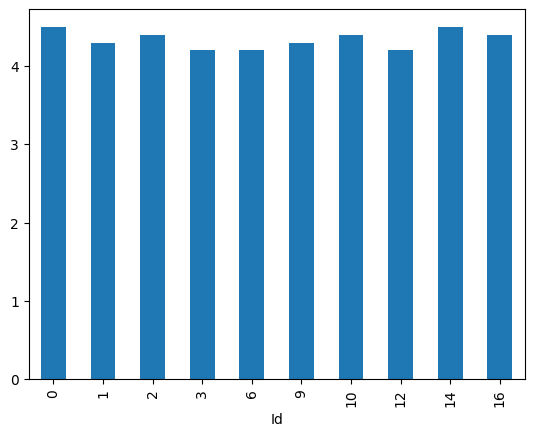

In [18]:
datasetRPG = nombresRPG.head(10)
#No es lo optimo
datasetRPG.drop(['Title'],axis=1)['Rating'].plot(kind='bar')

<h4><b>MOSTRANDO LOS PRIMEROS 10 VIDEOJUEGOS RATING CON SU TITULO CORRESPONDIENTE</b></h4>

<Axes: xlabel='Title'>

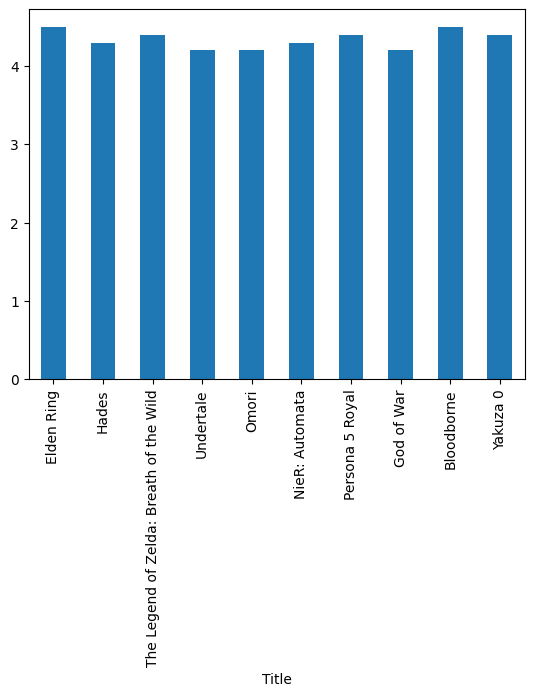

In [19]:
datasetRPG = nombresRPG.head(10)
datasetRPG.set_index('Title', inplace=True)  # Establecer la columna 'Title' como índice
datasetRPG['Rating'].plot(x=None, kind='bar')  # Utilizar el índice en el eje x


<h4><b>AGREGANDO LAS ETIQUETAS DE DATOS AL GRÁFICO</b></h4>

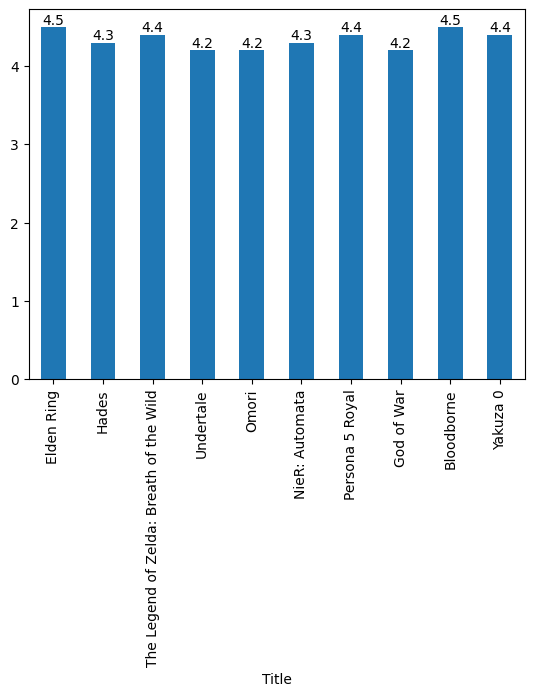

In [20]:
datasetRPG = nombresRPG.head(10)
datasetRPG.set_index('Title', inplace=True) #Inplace Modifica el DataFrame dataserRPG directamente sin necesidad de reasignarlo

grafico = datasetRPG['Rating'].plot(kind='bar')

#Agregando etiquetas de rating en las barras
for i, rating in enumerate(datasetRPG['Rating']):  #enumarate: itera sobre los índices y valores de la serie 'Rating'
    grafico.annotate(str(rating), xy=(i, rating), ha='center', va='bottom') #ha: alineación horizontal - #va: alineación vertical

plt.show()

<h4><b>OTRA FORMA DE AGREGAR LAS ETIQUETAS DE DATOS AL GRÁFICO (PERSONALIZACIÓN)</b></h4>


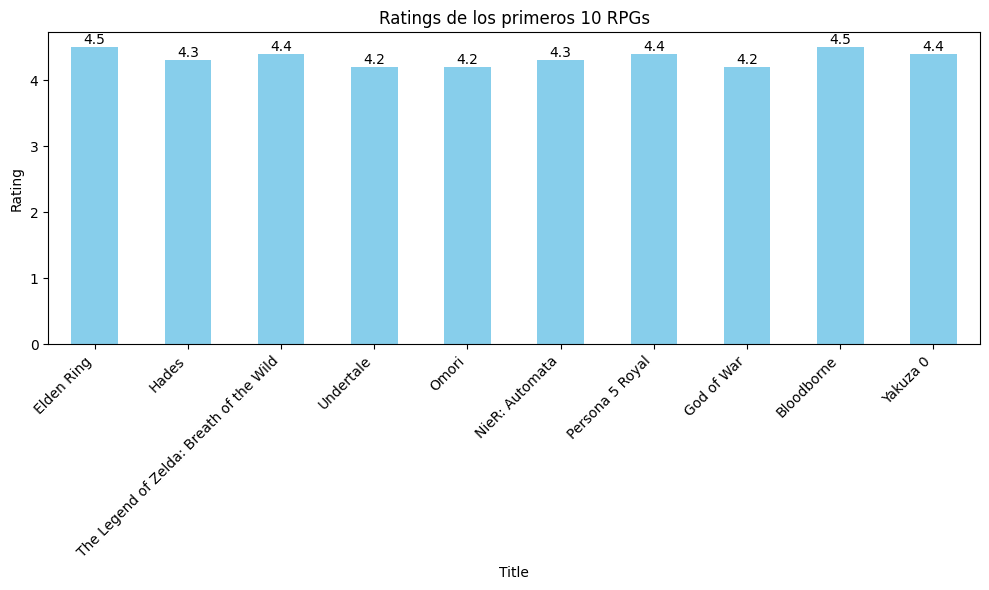

In [21]:
# Se puede comprimir en una linea
# Primeras 10 filas y establecer 'Title' como índice
datasetRPG = nombresRPG.head(10).set_index('Title')

# Creación un gráfico de barras
NewGrafico = datasetRPG['Rating'].plot(kind='bar', figsize=(10, 6), color='skyblue') # figsize: tamaño del plot , color = color de las barras

# Se agrean las etiquetas de 'Rating' en las barras
for p in NewGrafico.patches: #paches: todas las barras del gráfico
    NewGrafico.annotate(f'{p.get_height():.1f}', (p.get_x() + p.get_width() / 2, p.get_height()), #get.height: obtiene la altura de la barra (valor Rating)
                ha='center', va='bottom')

# Configuración de las etiquetas y título
NewGrafico.set_ylabel('Rating')
NewGrafico.set_title('Ratings de los primeros 10 RPGs')
plt.xticks(rotation=45, ha='right') #rotación de las etiquetas del eje X en 45°, alineado a la derecha

# Mostrar el gráfico
plt.tight_layout() # función que permite ajustar el diseño del gráfico para que no se superpongan los elementos
plt.show()

<h4><b>PROMEDIO RATING VIDEOJUEGOS RPG</b></h4>

In [22]:
#La función lambda se aplica a cada elemento de la columna Genres
#Esta es una función comprueba si la cadena "RPG" está presente en el valor de cada fila (Resultado serie de booleanos)

ratings_RPG = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'RPG' in x)]['Rating']
promedio_RPG = ratings_RPG.mean()

promedio_RPG


np.float64(3.8325581395348833)

<h4><b>PROMEDIO RATING VIDEOJUEGOS INDIE</b></h4>

In [23]:
ratings_Indie = data_sin_nulos[data_sin_nulos['Genres'].apply(lambda x: 'Indie' in x)]['Rating']
promedio_Indie = ratings_Indie.mean()

promedio_Indie


np.float64(3.7031802120141344)

<h4><b>CREACIÓN DE UN NUEVO DATAFRAME (Género y Promedio)</b></h4>

In [24]:
#La función DataFrame crea un nuevo DataFrame vacío o a partir de datos existentes
#Recibe un diccionario, especificando las etiquetas de las columnas (claves) y sus valores respectivos
dataset_promedios = pd.DataFrame({'Género': ['RPG', 'Indie'], 'Promedio': [promedio_RPG, promedio_Indie]})

<h4><b>CREACIÓN DEL GRÁFICO CIRCULAR</b></h4>

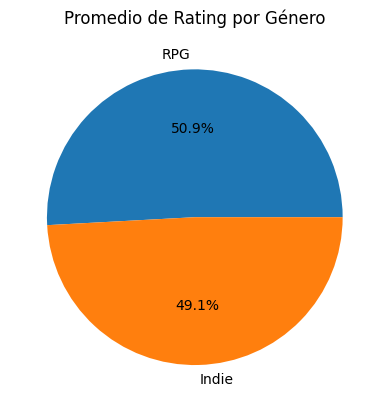

In [25]:
#plt.pie crea gráficos circulares
#autopct: es una cadena de formato que especifica cómo se mostrarán los porcentajes en el gráfico circular
plt.pie(dataset_promedios['Promedio'], labels=dataset_promedios['Género'], autopct='%1.1f%%')
plt.title('Promedio de Rating por Género')
plt.show()


<h4><b>EXPORTANDO EL NUEVO DATASET SIN NULOS</b></h4>

In [26]:
output = "/content/drive/MyDrive/Colab/data/games-clean.csv"

In [27]:
data_sin_nulos.to_csv(output)

OSError: Cannot save file into a non-existent directory: '\content\drive\MyDrive\Colab\data'